# Actividad. TF-IDF | Emotion Dataset

### Nombre: Jhostyn Javier Gavilánez Suárez

El código muestra un ejemplo completo de cómo procesar, analizar y clasificar un conjunto de datos de emociones utilizando TF-IDF y un modelo de aprendizaje automático.


In [1]:
# Importar las bibliotecas esenciales
import pandas as pd  # Importar pandas para el manejo de datos
import numpy as np   # Importar numpy para operaciones numéricas
import matplotlib.pyplot as plt  # Importar matplotlib para visualizaciones básicas
import seaborn as sns  # Importar seaborn para visualizaciones más avanzadas

# Configurar matplotlib para mostrar gráficos en línea
%matplotlib inline  

In [2]:
import nltk  # Importar la biblioteca NLTK
import subprocess  # Importar la biblioteca subprocess para ejecutar comandos del sistema operativo
import zipfile  # Importar la biblioteca zipfile para trabajar con archivos zip

# Descargar y descomprimir WordNet si no está disponible
try:
    nltk.data.find('wordnet.zip')  # Intentar encontrar el archivo zip de WordNet en los recursos de NLTK
except:
    nltk.download('wordnet', download_dir='./results/')  # Descargar WordNet en el directorio './results/'
    with zipfile.ZipFile('./results/corpora/wordnet.zip', 'r') as zip_ref:  # Descomprimir el archivo zip de WordNet
        zip_ref.extractall('./results/corpora')
    nltk.data.path.append('./results/')  # Agregar el directorio './results/' al path de NLTK

# Importar la clase WordNet del corpus de NLTK
from nltk.corpus import wordnet  


[nltk_data] Downloading package wordnet to ./results/...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Cargar el conjunto de datos desde un archivo CSV
data = pd.read_csv('./archive/Emotion_classify_Data.csv')

# Verificar las dimensiones del conjunto de datos
print(data.shape)

# Mostrar las primeras 5 filas del conjunto de datos
data.head()


(5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


#### Attributes Description:

1. Comment - a diverse collection of text samples
2. Emotion - corresponding emotion the text conveys ['anger', 'joy', 'fear']

In [4]:
# descripción general de nivel superior del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [5]:
# definir una función para procesar los datos textuales en la columna `asunto`
# pasos (eliminar puntuación, tokenización, eliminar palabras vacías, derivación, lematización)
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
from shutil import move

# Descargar los stopwords en la ubicación predeterminada
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

# Compilar expresión regular para eliminar puntuación
punctuation = re.compile("[" + re.escape(string.punctuation) + "]")

# Definir la lista de stopwords
stopwords_list = stopwords.words('english')
stopwords_list += ['feel', 'feeling', 'really', 'time', 'im', 'know', 'make', 'little']

# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Mover los stopwords a la carpeta deseada
#stopwords_dir = os.path.join('results', 'stopword')
#os.makedirs(stopwords_dir, exist_ok=True)
#for file_id in stopwords.fileids():
#    src_file = nltk.data.find('corpora/stopwords/' + file_id)
#    dest_file = os.path.join(stopwords_dir, file_id)
#    move(src_file, dest_file)

# Mover los recursos de punkt a la carpeta deseada
#punkt_dir = os.path.join('results', 'punkt')
#os.makedirs(punkt_dir, exist_ok=True)
#for file_id in nltk.data.find('tokenizers/punkt'):
#    if 'tokenizers/punkt' in file_id:
#        src_file = nltk.data.find(file_id)
#        dest_file = os.path.join(punkt_dir, os.path.basename(file_id))
#        move(src_file, dest_file)
        

    
# La función procesa un texto eliminando la puntuación, tokenizándolo en palabras, removiendo stopwords y lematizando las palabras.
def textProcess(text):
    res = []
    text_punc_remove = re.sub(punctuation, '', text)
    tokens = word_tokenize(text_punc_remove)
    for token in tokens:
        if token.lower() not in stopwords_list:
            lemmatized_word = lemmatizer.lemmatize(token)
            res.append(lemmatized_word)
    return ' '.join(res)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
# insertamos una nueva columna que contiene el texto procesado de la columna 'Comentario'
data['processed_text'] = data['Comment'].apply(textProcess)

# devolver las primeras 5 filas del conjunto de datos con una columna adicional
data.head()

,Comment,Emotion,processed_text
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death reluctant drop
1,im so full of life i feel appalled,anger,full life appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ive angry r like idiot trusting first place
4,i feel suspicious if there is no one outside l...,fear,suspicious one outside like rapture happened s...


In [7]:
# El módulo `wordcloud` en Python permite crear visualizaciones gráficas de las palabras más frecuentes en un texto, mostrando el tamaño de cada palabra en función de su frecuencia.
!pip install wordcloud

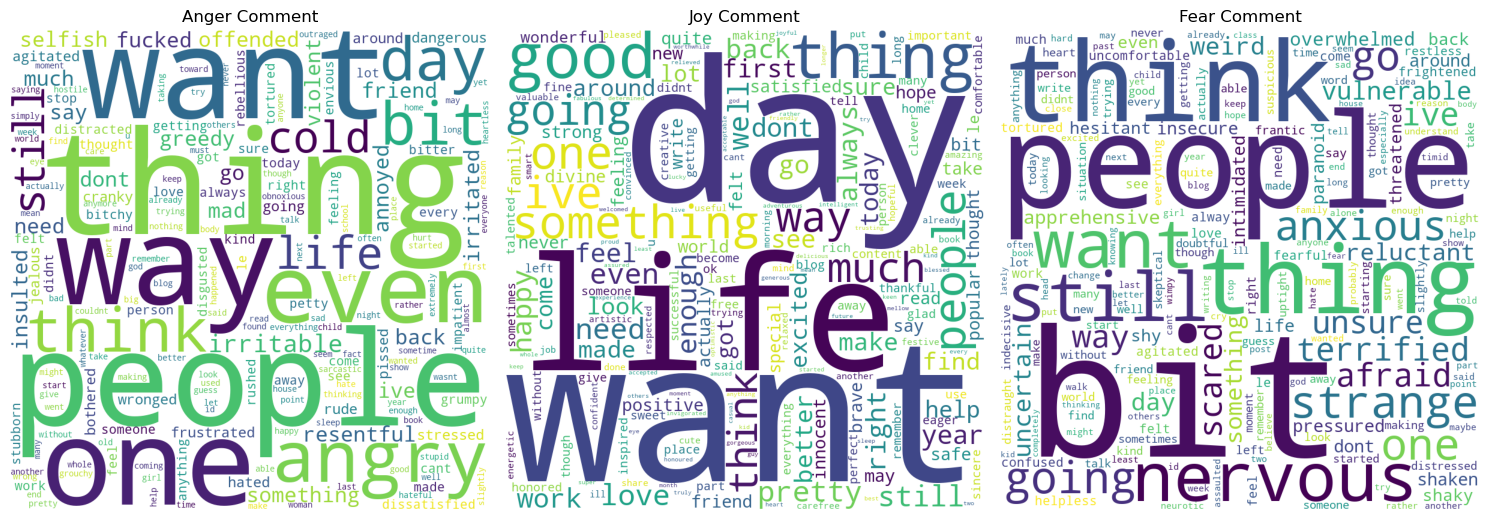

In [8]:
# Pregunta: ¿cuáles son las palabras comunes en el texto de ira, miedo y alegría?
from wordcloud import WordCloud

# Agrupar el DataFrame por la columna 'Emotion'
emotion = data.groupby('Emotion')

# Obtener los grupos correspondientes a cada emoción ('anger', 'joy', 'fear')
anger = emotion.get_group('anger')
joy = emotion.get_group('joy')
fear = emotion.get_group('fear')

# Combinar los textos de cada emoción en una sola cadena de texto
combined_anger_text = ' '.join(anger['processed_text'])
combined_joy_text = ' '.join(joy['processed_text'])
combined_fear_text = ' '.join(fear['processed_text'])

# Crear nubes de palabras ('Word Clouds') para cada emoción
wordcloud_anger = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_anger_text)

wordcloud_joy = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_joy_text)

wordcloud_fear = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_fear_text)
 
# Mostrar las nubes de palabras en una sola figura
figure, axes = plt.subplots(1,3, figsize=(15,6))
axes[0].imshow(wordcloud_anger)
axes[0].axis('off')
axes[0].set_title('Anger Comment')

axes[1].imshow(wordcloud_joy)
axes[1].axis('off')
axes[1].set_title('Joy Comment')

axes[2].imshow(wordcloud_fear)
axes[2].axis('off')
axes[2].set_title('Fear Comment')

plt.savefig('./__results___files/wordcloud_result_1.png')  # Guardar la imagen en la ruta especificada

plt.tight_layout()
plt.show()

#### Data Processing

In [9]:
# Dividir el conjunto de datos en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir el texto procesado ('processed_text') en X y las etiquetas ('Emotion') en y
Xtrain, Xtest, ytrain, ytest = train_test_split(data['processed_text'], data['Emotion'], test_size=0.2, random_state=122)

# Verificar las dimensiones de los conjuntos de datos de entrenamiento y prueba
print('Xtrain: ', Xtrain.shape)
print('Xtest: ', Xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)

Xtrain:  (4749,)
Xtest:  (1188,)
ytrain:  (4749,)
ytest:  (1188,)


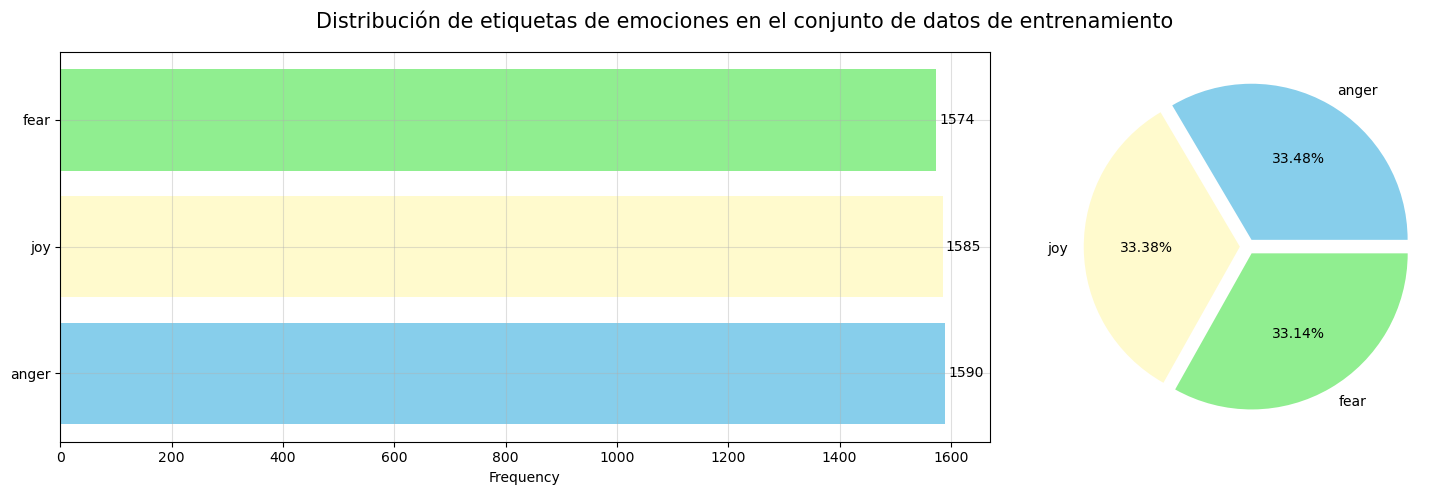

In [10]:
# Distribución de las clases de la etiqueta/target en los datos de entrenamiento

# Calcular la frecuencia de cada etiqueta
target = ytrain.value_counts()

# Crear una figura con dos subgráficos, uno para la barra horizontal y otro para el gráfico circular
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})

# Graficar la barra horizontal
axes[0].barh(y=target.index, width=target.values, color=['skyblue','lemonchiffon','lightgreen'])
axes[0].set_xlabel('Frequency')

# Mostrar el valor de cada barra en la gráfica
for index, values in enumerate(target):
    axes[0].text(values+5, index, str(values), va='center')

axes[0].grid(alpha=0.4)

# Graficar el gráfico circular
axes[1].pie(target.values, labels=target.index, explode=[0.05,0.05,0.05], colors=['skyblue','lemonchiffon','lightgreen'], autopct='%.2f%%')
# Título de la figura
figure.suptitle('Distribución de etiquetas de emociones en el conjunto de datos de entrenamiento', fontsize=15)

plt.savefig('./__results___files/wordcloud_result_2.png')  # Guardar la imagen en la ruta especificada

plt.tight_layout()
plt.show()

In [11]:
# Codificación de la característica target/label para los conjuntos de datos de entrenamiento y prueba
from sklearn.preprocessing import LabelEncoder

# Inicializar el objeto LabelEncoder
encoder = LabelEncoder()

# Codificar los datos de entrenamiento
ytrain_encoded  = encoder.fit_transform(ytrain)

# Codificar los datos de prueba
ytest_encoded = encoder.transform(ytest)

In [12]:
# Verificar las etiquetas correspondientes de la etiqueta numérica codificada
numLabel = np.unique(ytrain_encoded)
print(numLabel)
labels = encoder.inverse_transform(numLabel)
labels

[0 1 2]


array(['anger', 'fear', 'joy'], dtype=object)

In [13]:
# Transformación de características - TF-IDF al texto procesado
from sklearn.feature_extraction.text import TfidfVectorizer

# inicializar el objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# vectorizar y realizar TF*IDF a los datos de entrenamiento
Xtrain_vectorized = vectorizer.fit_transform(Xtrain)

# vectorizar y realizar TF*IDF a los datos de prueba
Xtest_vectorized = vectorizer.transform(Xtest)

In [14]:
# la palabra en la `bolsa` (vector de palabra completo, vocabulario)
vocab = vectorizer.get_feature_names_out()

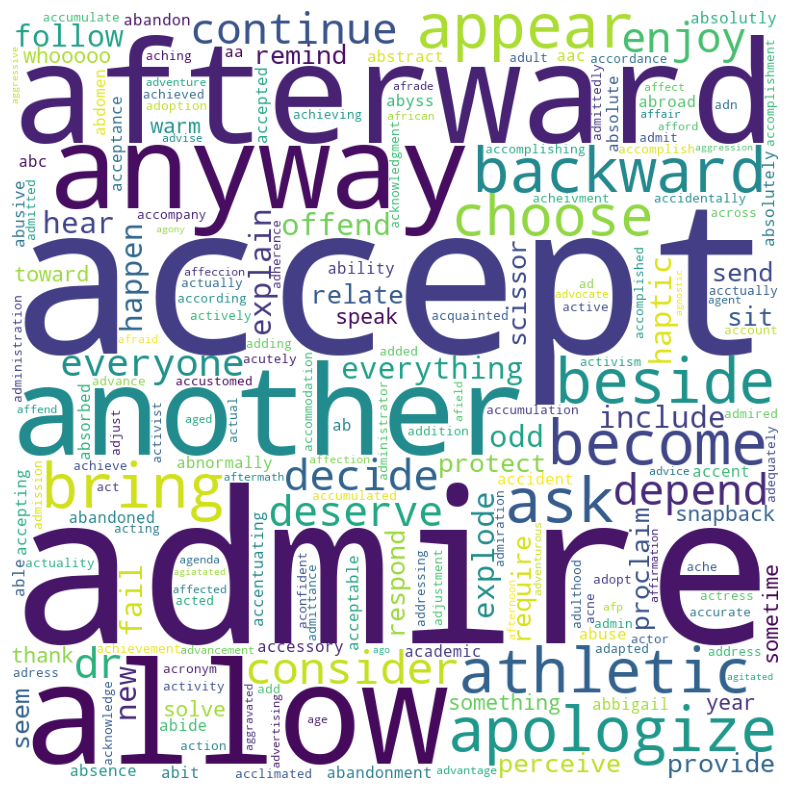

In [15]:
# Pregunta: ¿cuáles son las palabras comunes en el vocabulario?

combined_vocab = ' '.join(vocab)


# crear una nube de palabras usando el texto combinado
wordcloud_vocab = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_vocab)
 
# plot de la imagen de la nube de palabras
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_vocab)
plt.savefig('./__results___files/wordcloud_result_3.png')  # Guardar la imagen en la ruta especificada
plt.axis('off')
plt.show()

#### Trained a Classification Model with MultinomialNB Classifiers

In [16]:
# entrenar un modelo de clasificación usando MultinomialNB
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB()
mNB.fit(Xtrain_vectorized, ytrain_encoded)

MultinomialNB()

In [17]:
# evaluar el rendimiento del modelo en el conjunto de datos de prueba
ypred = mNB.predict(Xtest_vectorized)

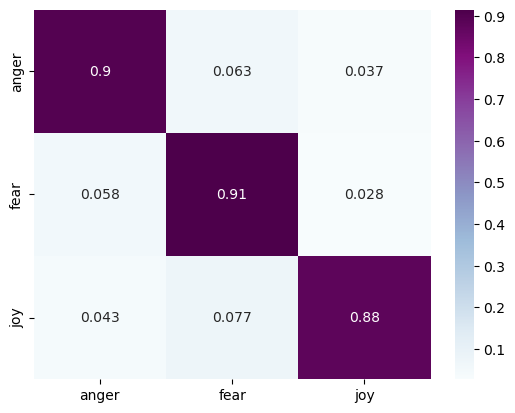

In [18]:
from sklearn.metrics import confusion_matrix

# calcular la matriz de confusión en el conjunto de datos de prueba
cm_test = confusion_matrix(ytest_encoded, ypred, normalize='true')

# visualizar la matriz de confusión en un mapa de calor
plt.figure()
sns.heatmap(cm_test, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.savefig('./__results___files/wordcloud_result_4.png')  # Guardar la imagen en la ruta especificada
plt.show()

In [19]:
# generar el reporte de clasificación (precision, recall, F1 y accuracy score)
from sklearn.metrics import classification_report

test_report = classification_report(ytest_encoded, ypred, target_names=labels)
print(test_report)

              precision    recall  f1-score   support

       anger       0.90      0.90      0.90       410
        fear       0.85      0.91      0.88       363
         joy       0.94      0.88      0.91       415

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188

